# 선형회귀(Numpy)
> 선형 회귀는 독립 변수(x)와 종속 변수(y)간의 선형 관계를 모델링해서 예측하는 통계기법

## 모델
- 단순 모델 : y = ax + b
- 다중 모델 : y = a1x1 + a2x2 + ... + anxn + b

## 머신 러닝 활용
- y와 x가 결정 => {a, b} 매개 변수를 찾아야 함.
- y와 x가 선형 관계를 가져야 함. 
- 이상치와 다중공선성.
- 다중공선성이 있다 -> 전처리를 잘못했다. 원데이터로부터 파생테이터를 잘못만들었다. -> 결측치 어떻게 봉합니까?
- 데이터가 상관관계가 있다고 믿는다. -> 데이터간의 관계를 만든다.
- 지도 학습, 비지도 학습
- 비지도 학습은 군집 알고리즘이 핵심: 비슷한 애들까리 묶는다. 경향성이 있다. 군집.

## {a, b} 매개 변수를 찾아야 함!
- 매개변수를 찾는 방법: 최소제곱법, 경사하강법
- 평가는 : MSE, R^2


###### [깨알 노트]
###### 점과 직선의 방정식

---

## 예제1. 
>어떤 회사의 연도별 매출이 광고비에 의존한다고 가정하자(선형**이기 때문에!)
><br>아래 데이터가 주어질 때, 광고비가 8일 때 매출을 예상하세요!

    | 광고비 | 매출   |
    | 2     | 81    |
    | 4     | 93    |
    | 6     | 91    |
    | 8     | ?     |

    -> 광고비 x 이고, 매출 y라고 생각.
       종속 y를 찾으세요 라는 문제로 생각!

    -> y = ax + b
        81 = 2a + b
        93 = 4a + b
        91 = 6a + b
        ? = 8a + b

    -> 방법1: 무차별 대입법(반복문으로)
    -> 방법2: 연립방정식
    -> 방법3: 최소제곱법
    -> 방법4: 경사하강법

In [ ]:
# 최소제곱법
import numpy as np

# 데이터 준비
X = np.array([2, 4, 6])
y = np.array([81, 93, 91])

# 최소제곱법(평균)
X_mean = np.mean(X)
y_mean = np.mean(y)

# 최소제곱법(계산)
# 제곱의 합(SS)이 최소가 되는 해
# 기울기 미분계수로 구하면 좋지만 통계에서 사용하는 밑의 방법으로 구한다.
# Cov(x, y) / Var(x) => a를 구하는 방법(통계)
#a = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
#b = y_mean - a * X_mean

X = np.column_stack([X, np.ones(len(X))]) # b항에 디폴트 값으로 1을 넣어줌, 0으로 하는것은 안됨! -> 머신러닝에서는 무작위값을 넣어줘야함!!!
a, b = np.linalg.lstsq(X, y)[0] # LinAlgError: 1-dimensional array given. Array must be two-dimensional


print(f"기울기: {a:.2f}, 절편: {b:.2f}")

x_pred = 8
y_pred = a * x_pred + b
print(f"광고비: (8), 절편: {y_pred:.2f}")

기울기: 2.50, 절편: 78.33
광고비: (8), 절편: 98.33


In [ ]:
X - X_mean # numerical array라서 선형 연산 list는 안됨 주의!

array([-2.,  0.,  2.])

In [4]:
(X - X_mean) * (y - y_mean) / (X - X_mean)**2

C:\Users\user\AppData\Local\Temp\ipykernel_18912\1287775272.py:1: RuntimeWarning: invalid value encountered in divide
  (X - X_mean) * (y - y_mean) / (X - X_mean)**2


array([3.66666667,        nan, 1.33333333])

In [5]:
np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)

np.float64(2.5)

---

## 예제2: 
>어떤 회사의 

가격(x1):온도(x2):판매량(y)
5:20:65
7:22:70
9:23:60
8:24:?

- y = a1x1 + a2x2 + b

In [10]:
# 최소제곱법
import numpy as np

# 데이터 준비
X = np.array([[5,20], [7,22], [9,23]])
y = np.array([65, 70, 91])

X_bias = np.column_stack([X, np.ones(len(X))]) # 옆에 컬럼 추가

# 최소제곱법(계산)
#a1, a2, b = np.linalg.lstsq(X_bias, y)[0]
coeffs = np.linalg.lstsq(X_bias, y)[0]

print(f"기울기1: {coeffs[0]:.2f}, 기울기2: {coeffs[1]:.2f}, 절편: {coeffs[-1]:.2f}")

#x_pred = [8, 24]
y_pred = np.dot([8, 24, 1], coeffs)
#y_pred = a * x_pred + b
print(f"광고비: (8,24), 절편: {y_pred:.2f}")

기울기1: 18.50, 기울기2: -16.00, 절편: 292.50
광고비: (8,24), 절편: 56.50


In [7]:
coeffs = np.linalg.lstsq(X_bias, y)[0]
print(coeffs)

[ 18.5 -16.  292.5]


2x + 3y = 8

[[2 3]
 [4 -1]]

[[X]
 [y]]

* 
* 역행렬은 항상 존재하는 것이 아니기 때문에 

# 머신러닝
# 딥러닝(장점: 기울기를 자동으로 찾아준다, 단점: 시간이 오래 걸린다)

# Numpy를 활용한 선형회구 모델(v1)

> pip install scikit-learn 설치하세요

In [18]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

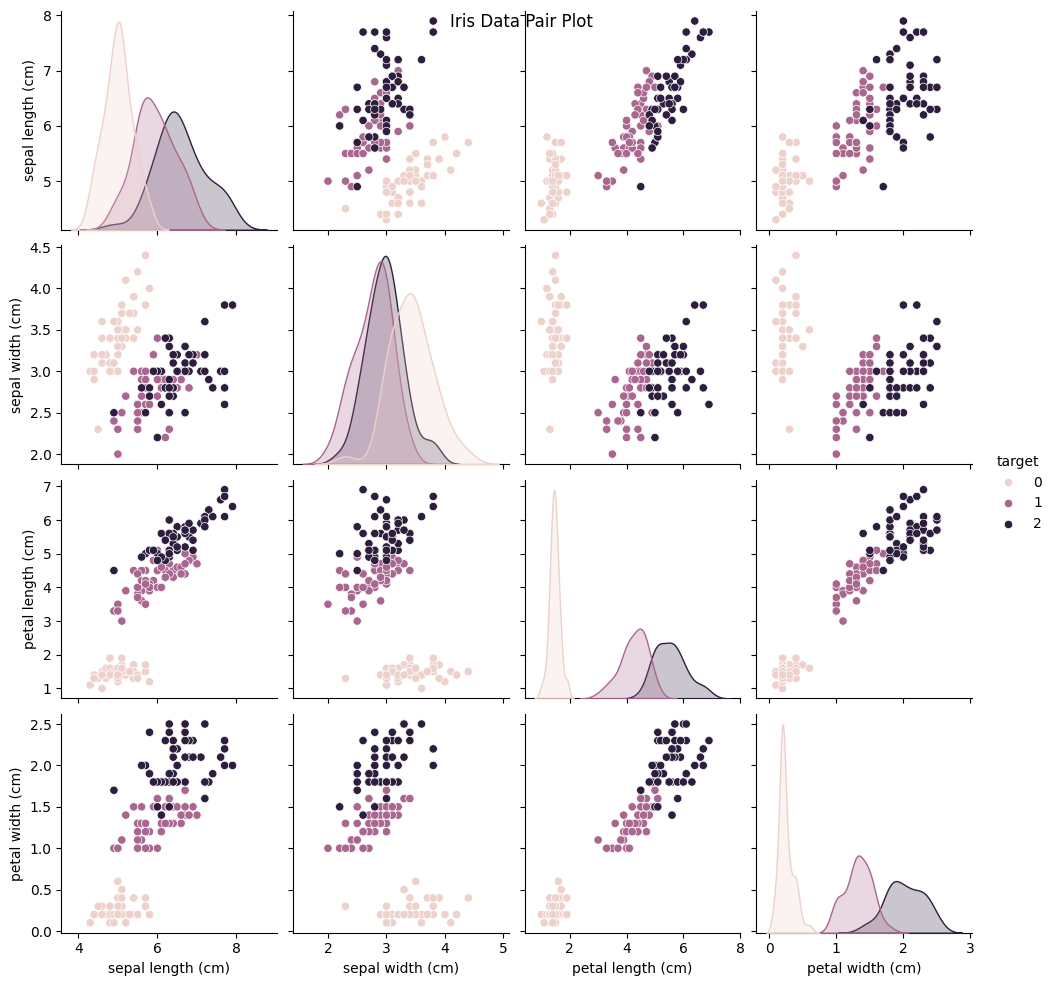

In [21]:
sns.pairplot(iris_df, hue="target")
plt.suptitle("Iris Data Pair Plot")
plt.show()

## 범주형, 분류인데 회귀모델로 바꾸라는 요청(회귀모델은 범주형 데이터로 안됨!) -> 실수 또는 연속된 정수로 변경해야겠다!
### y와 x를 결정하세요!

In [24]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
y = iris.data[:, 1] # 범주형 데이터 target 없는 원본데이터를 슬라이싱(새로운 데이터)
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [ ]:
# 1. 데이터 전처리
# 2. (전처리 데이터로) 모델 만들기
# 3. 예측

In [ ]:
# 학습 데이터 뽑기: 이렇게 범주형, 카테고리가 나눠져 있는 데이터는 각 카테고리별로 균질하게 뽑아야 한다.
# 데이터 크기에 따라 아래 중 하나의 비율로 나눔
# * 70:30
# * 80:20
# * 75:25

In [29]:
X = np.column_stack([iris.data[:, 0], iris.data[:, 2], iris.data[:, 3]])
y = iris.data[:, 1]
print(X.shape, y.shape)

(150, 3) (150,)


In [ ]:
# 학습 데이터 뽑기: 이렇게 범주형, 카테고리가 나눠져 있는 데이터는 각 카테고리별로 균질하게 뽑아야 한다.
def custom_train_text_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state) # 이것의 의미
    indices = np.random.permutation(len(X)) # 순열을 이용해서 순서를 섞는다.
    split_idx = int(len(X) * (1 - test_size))
    train_idx = indices[:split_idx]
    test_idx = indices[split_idx:]

    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = custom_train_text_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 3) (45, 3) (105,) (45,)


In [ ]:
def fit_linear_regression_lsq(X, y):
    X_bias = np.column_stack([np.ones(len(X)), X]) # 순서 매우 중요하다! 절편, X
    cofficients, _, _, _ = np.linalg.lstsq(X_bias, y)
    intercept_ = cofficients[0] # 절편
    coef_ = cofficients[1:]

    return coef_, intercept_ # 항상 coef값이 앞에 나가야 한다!!!!!
    #np.linalg.lstsq(X, y) # 절편이 없다.....!

# ===========================================================
#X_bias = np.column_stack([np.ones(len(X)), X])
#cofficients, residuals, rank, s = np.linalg.lstsq(X_bias, y)
#의 결과 
# ===========================================================
# (array([ 1.04308908,  0.60706601, -0.58603225,  0.55803034]),
# array([13.47389927]),
# np.int32(4),
# array([89.64897205, 14.68621972,  2.25240873,  1.09243543]))
# ===========================================================
# [0] cofficients : 계수
# [1] residuals : 잔차
# [2] rank x들의 차수
# [3] s: 특이값

In [41]:
fit_linear_regression_lsq(X, y)

(array([ 0.60706601, -0.58603225,  0.55803034]),
 np.float64(1.0430890827987307))

In [ ]:
def predict_linear_regression_lsq(X, coef_, intercept_):
    return X @ coef_ + intercept_ # at

In [50]:
coef_, intercept_ = fit_linear_regression_lsq(X_train, y_train)
y_pred_custom = predict_linear_regression_lsq(X_test, coef_, intercept_)

In [ ]:
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
print(mse_custom, r2_custom) # 베이스 모델

0.08472197157942186 0.38100017156758104


### LinearRegression으로 풀기

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_lr)
print(mse_custom, r2_custom)

0.08472197157942186 0.3810001715675848


In [ ]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_train, y_train) ##### scikit-learn은 전부 이렇게 사용하도록
y_pred_br = br.predict(X_test) ##### scikit-learn은 전부 이렇게 사용하도록
mse_br = mean_squared_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)
print(mse_br, r2_br)

0.08450878298803613 0.3825577805210957


##### 위의 것을 시각화해보기!

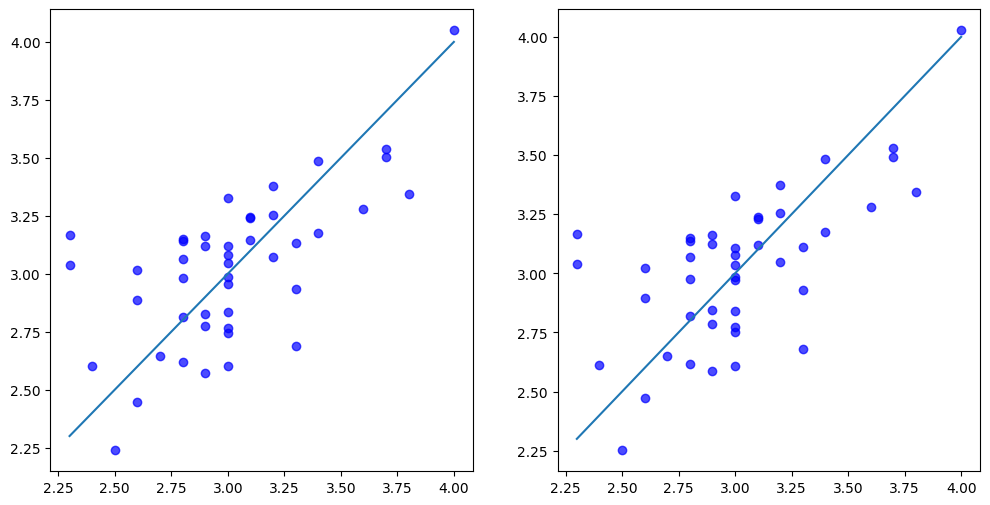

In [60]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].scatter(y_test, y_pred_custom, alpha=0.7, color="blue")
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

axes[1].scatter(y_test, y_pred_br, alpha=0.7, color="blue")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

---

In [ ]:
# 잘못된 방법
X_bias = np.column_stack([X, np.ones(len(X))]) # 순서 매우 중요하다! 절편이 뒤로 가면 이렇게 나옴
np.linalg.lstsq(X_bias, y)[0] # array([ 0.60706601, -0.58603225,  0.55803034,  1.04308908])

array([ 0.60706601, -0.58603225,  0.55803034,  1.04308908])

In [ ]:
# 올바른 방법
X_bias = np.column_stack([np.ones(len(X)), X]) # 순서 매우 중요하다! 절편, X, 절편이 앞으로!
np.linalg.lstsq(X_bias, y)[0] # array([ 1.04308908,  0.60706601, -0.58603225,  0.55803034])

array([ 1.04308908,  0.60706601, -0.58603225,  0.55803034])

In [ ]:
X_bias = np.column_stack([np.ones(len(X)), X]) # 순서 매우 중요하다! 절편, X, 절편이 앞으로!
cofficients, residuals, rank, s = np.linalg.lstsq(X_bias, y)
intercept_ = cofficients[0]
coef_ = cofficients[1:]

---

## 1. 전처리 -> 2. 모델 -> 3. 예측 -> 4. 평가

### [전처리]
>이상치 잘 처리해야 한다!!!!!<br>
>* 결측치<br>
>* 숫자<br>**
>* <br>



### [모델]
>무슨 경향을 알려주려나 보다<br>결정트리 외에는 전부 기울기 싸움<br>
>* 기울기: 방향성, 예측 -> 답이 아니기 때문에 오차가 생긴다!<br>
>* 절편: 

### [예측]
><br>
>* y hat<br> 

### [평가]
>오차<br>
>* |y hat - y|<br>